# DIGIT RECOGNIZER PROJECT ASSIGMENT
This project has been prepared within the scope of the 8th Semester BIM 416 Deep Learning course in Software Engineering, Faculty of Engineering and Natural Sciences, Istanbul Zaim University.<br>
**030718024 Furkan ERHAN**

1. [Dataset](#1)
2. [Dataset Preparation](#2)
3. [Model Design & Fitting](#3)
4. [Predictions](#4)
5. [Visualizing Predictions](#5)
6. [Preparing a Submission](#6)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


<a id ="1" ></a>
# Dataset

In [2]:
traindata = pd.read_csv('../input/digit-recognizer/train.csv')
testdata = pd.read_csv('../input/digit-recognizer/test.csv')
testdata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
traindata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id ="2" ></a>
# Dataset Preparation 

In [4]:
x_train = traindata.drop(['label'], axis=1).values.astype('float32') / 255
y_train = keras.utils.to_categorical(traindata['label'].values.astype('float32'))

x_test = testdata.values.astype('float32') / 255

<a id ="3" ></a>
# Model Design & Fitting

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2228 - accuracy: 0.9312
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0969 - accuracy: 0.9703
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0681 - accuracy: 0.9790
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0400 - accuracy: 0.9871
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 8/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0283 - accuracy: 0.9906
Epoch 9/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0213 - accuracy: 0.9936
Epoch 10/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.02

<a id ="4" ></a>
# Predictions

In [7]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

875/875 [==============================] - 2s 2ms/step


<a id ="5" ></a>
# Visualizing Predictions

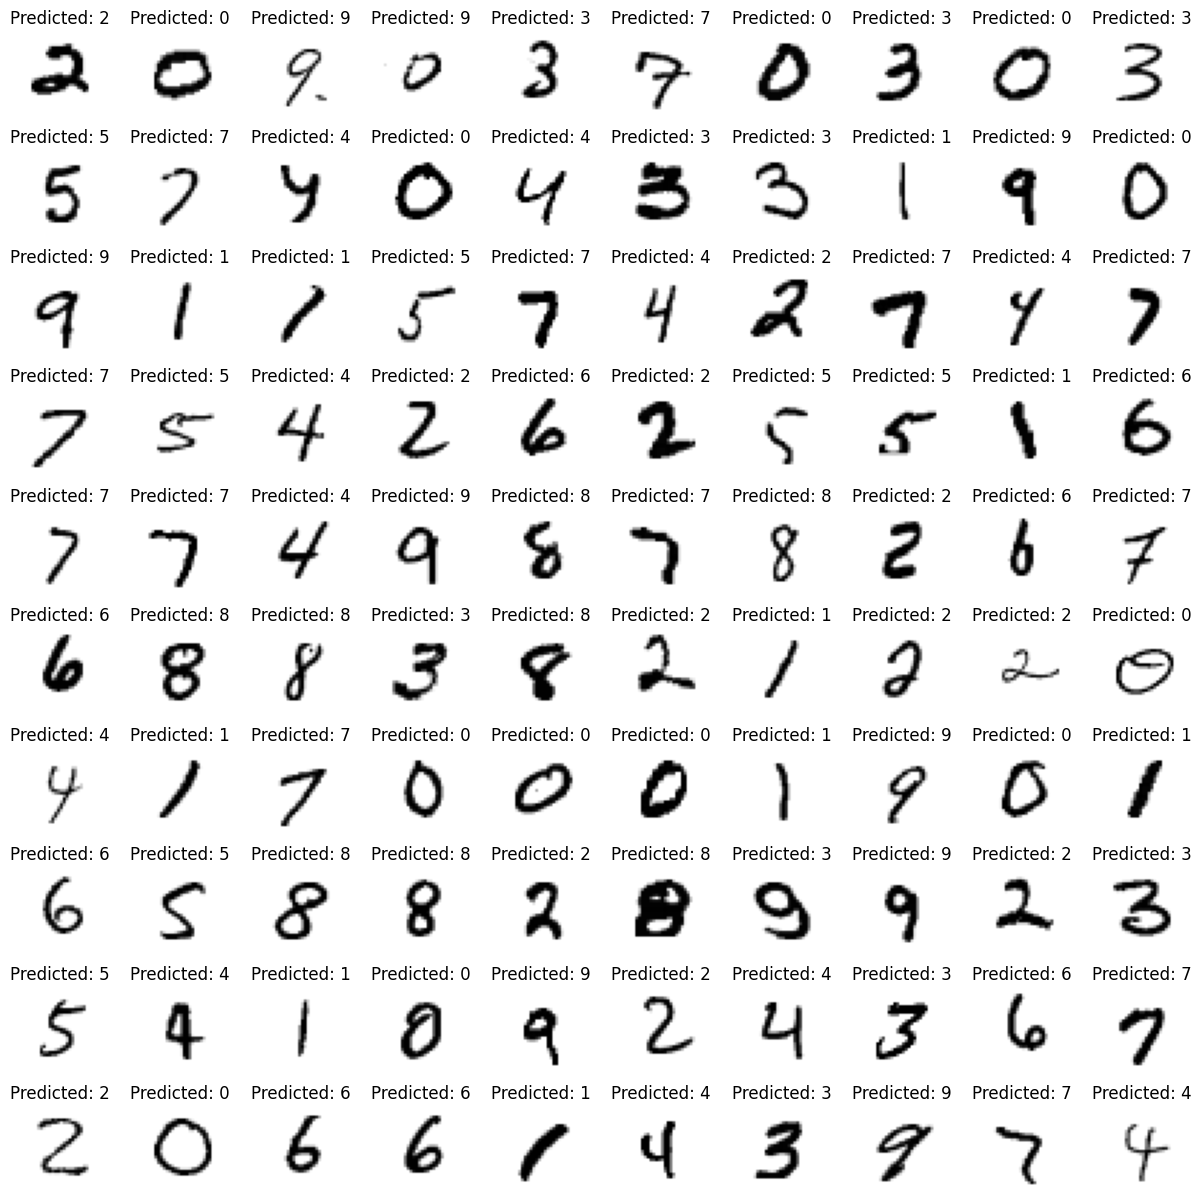

In [8]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(x_test[i*10 + j].reshape(28, 28), cmap=plt.cm.binary)
        axs[i, j].set_title("Predicted: {}".format(y_pred_labels[i*10 + j]))
        axs[i, j].axis('off')

plt.show()

<a id ="6" ></a>
# Preparing a Submission

In [9]:
sample = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
ids = []
for i in range(1,(len(y_pred_labels) +1)):
    ids.append(i)
submission = pd.DataFrame({'ImageId': ids, 'Label': y_pred_labels})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [11]:
submission.to_csv("submission.csv",index=False)

# Saving Model

In [13]:
model.save('mymodel.h5')